In [ ]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftp
from scipy.fft import fft, fftfreq

# Розклад функції в ряд Тейлора (1 бал) 🌞


Чи замислювались Ви над тим, що відбувається в процесорі тоді, коли йому потрібно обрахувати значення $\sin(30°)$ для розв’язку Вашого завдання з тригонометрії? “Так це ж усім відомо, що $\sin(30°)$ дорівнює $\frac{1}{2}$, тож і він має про це знати”. А що, якщо замість $30°$ буде $23°$ чи $73,9°$? Невже йому слід пам’ятати значення цієї функції для всіх можливих вхідних кутів? До того ж функція $\sin(x)$ не є унікальним винятком (принаймні в предметі цієї розмови) для такого обрахунку. “Тоді, можливо, обчислювальний пристрій уявляє прямокутний трикутник з даним кутом та шукає відношення протилежного катета до гіпотенузи?” Найімовірніше, побудова таких абстракцій можлива тільки, якщо попередньо знати значення функції, яке ми шукаємо. Дивовижний спосіб, який таки дозволяє порахувати шукане значення - це розклад-приближення “складної” функції у поліноміальну.


У даному прикладі зображено розклад функції func(x) = sin(x)


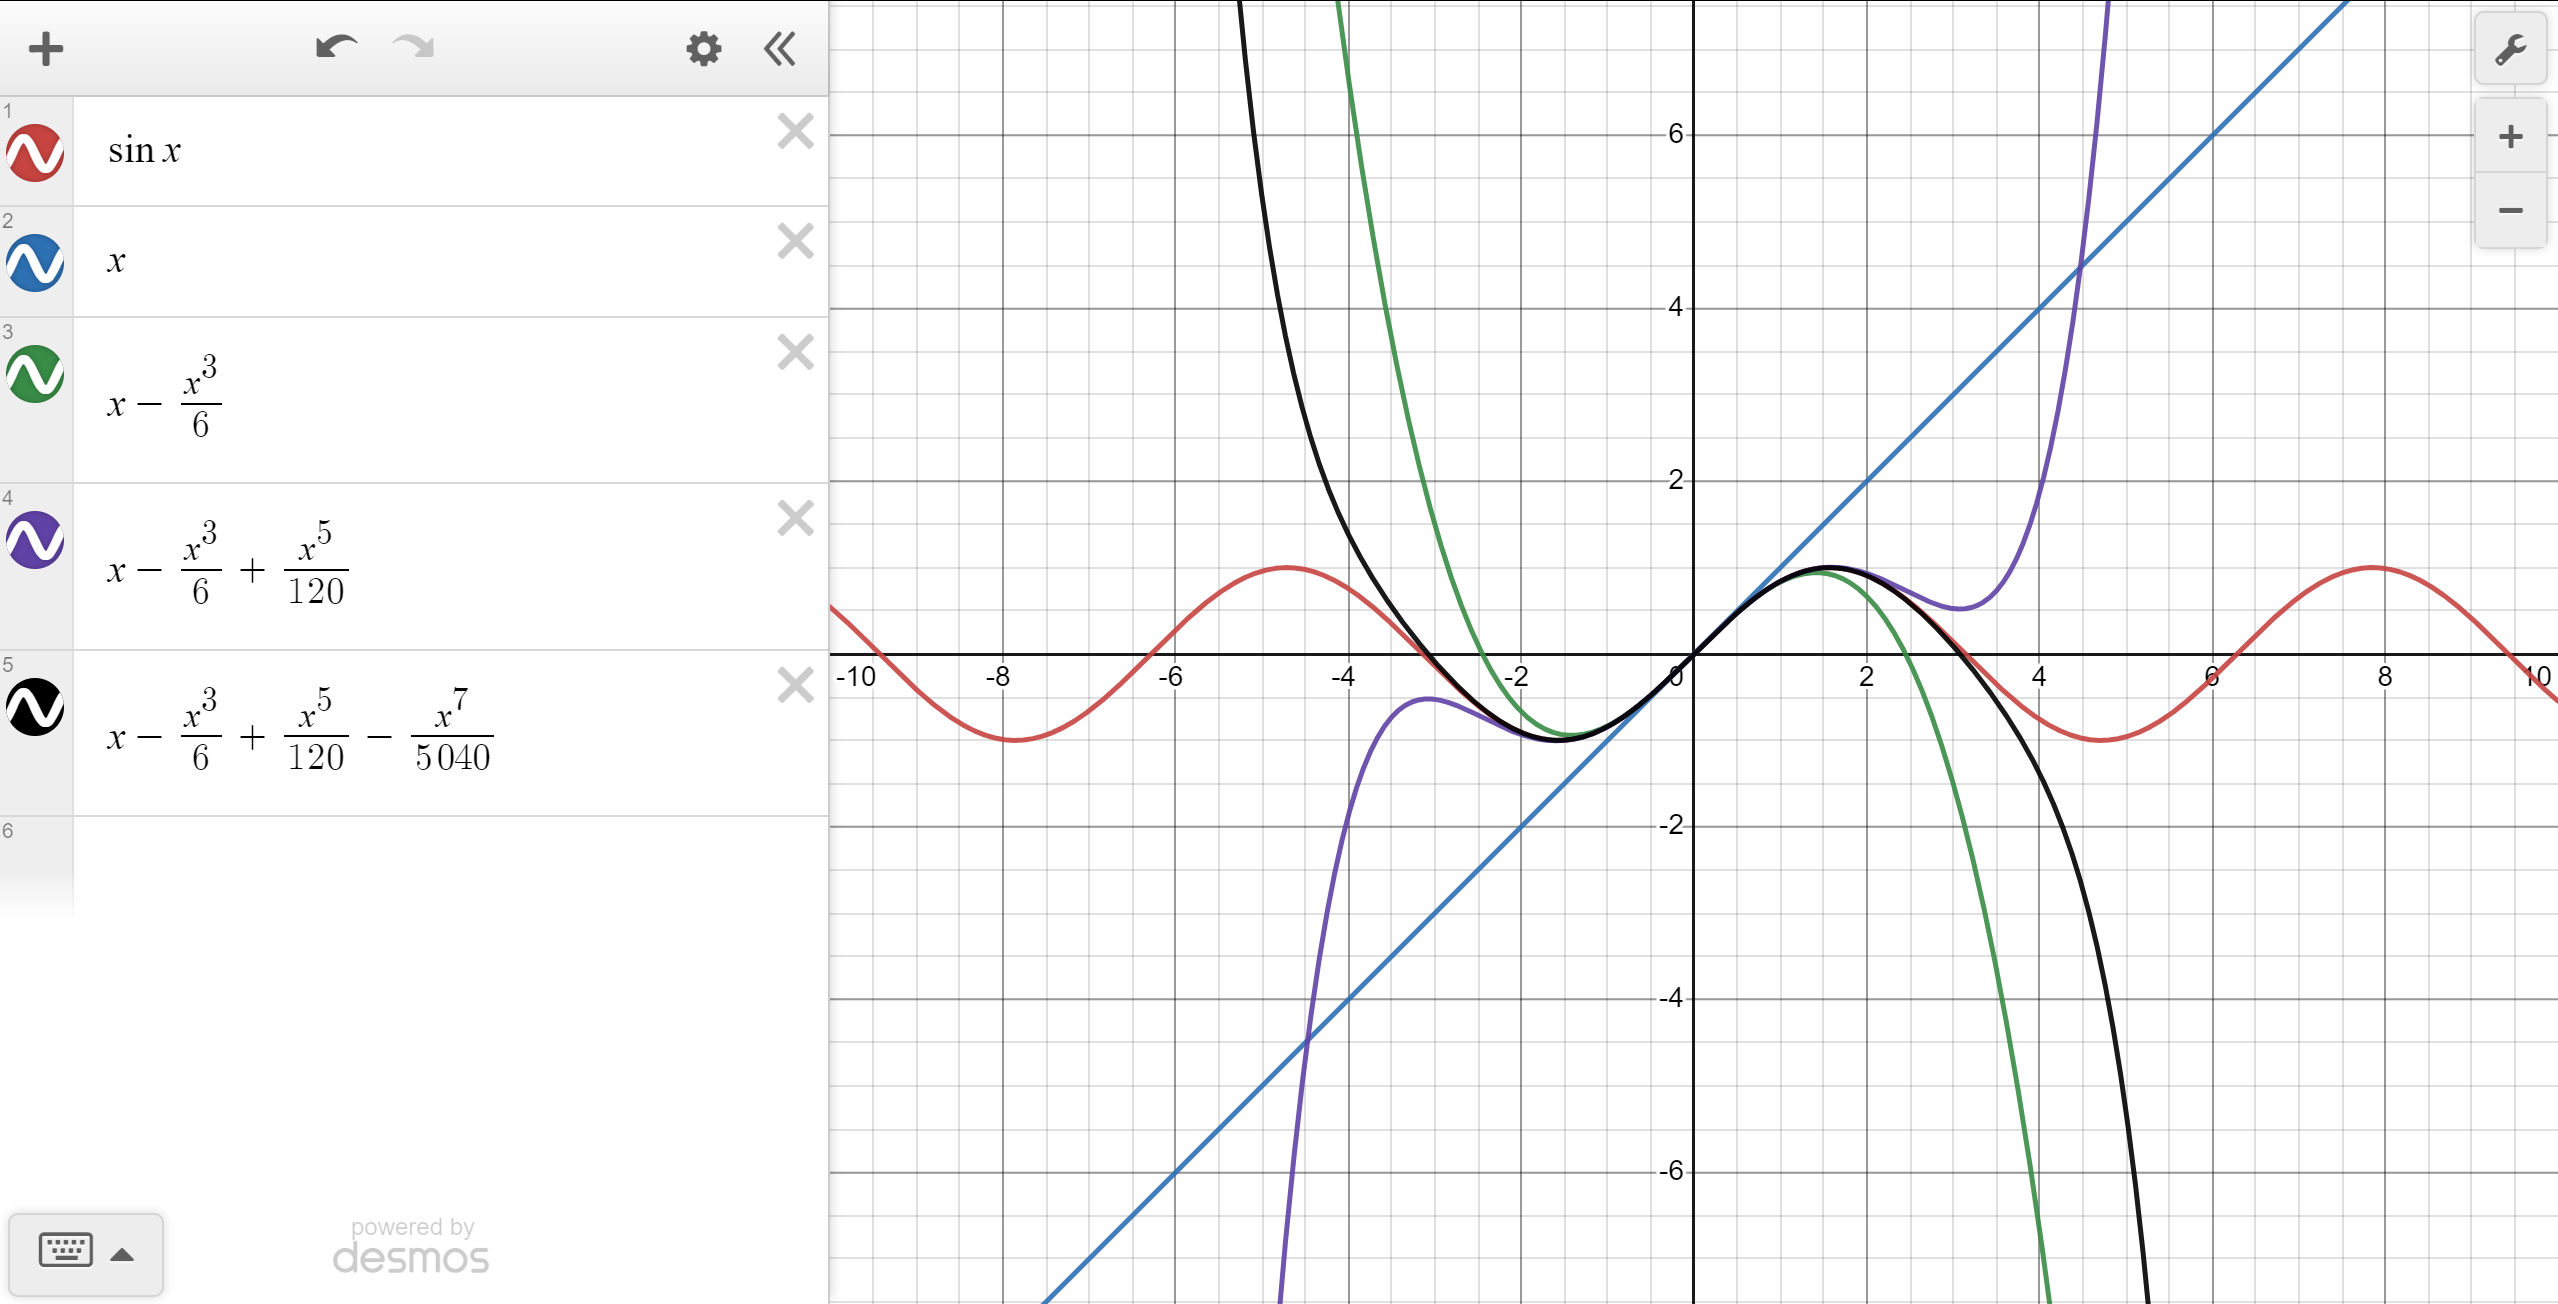

У цьому додатковому завданні ми пропонуємо Вам дослідити цю чарівну 
можливість наближеного обрахунку значення функції за допомогою її розкладу
в ряд Тейлора та порівняти отримане значення для різної кількості членів у доданку задля досягнення більш точного результату з значенням вбудованої функції в Python, а також візуалізувати відповідне наближення на графіку.

**Увага:** задля простоти, робитимемо розклад лише в околі нуля!

## Рекомендований хід роботи:

1. Згенеруйте вашу функцію у квізі (наприклад вам випаде func(x) = sin(x))

2. Напишіть python функцію, яка буде приймати як аргументи сам вираз у формі рядку (func="sin(x)") та кількість членів розкладy (terms=5). Функція має повертати sympy-вираз, який потім можна буде обчислити

3. Візуалізуйте саму функцію і розклади з різною кількістю доданків

4. 


In [ ]:
def generate_expansion(func, terms):
    """
    param func : str
    param terms : int
    return: sympy.core.add.Add (sympy expression)
    """

Для даного завдання ми рекомендуємо порахувати похідну за допомогою можливостей бібліотеки sympy. Усе необхідне є в документації. Особливу увагу радимо звернути на функції **sympify()** для перетворення рядку в "вираз", з яким зручно працювати в sympy, **diff()** для диференціювання, а також **evalf()** i **subs()** для обчислення значення виразу в точці.

[sympy docs](https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html)


## Підказки до роботи з Sympy

Приклади інсталяції бібліотеки sympy у JP Notebook:

PS: бажано імпорти робити у початковій клітинці разом для зручності запуску) 🐊

In [ ]:
!pip install mpmath
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Приклади виконання функцій:

In [ ]:
from sympy import *
import math
t = symbols("t")
init_printing(use_unicode=True)
derivative = diff(sin(t), t)
derivative

cos(t)

In [ ]:
second_derivative = diff(derivative, t)
second_derivative

-sin(t)

In [ ]:
second_derivative.evalf(subs={t: math.pi/6})

-0.500000000000000

PS : хто сам написав свою функцію, яка обраховує похідну, можна також візуалізувати похибку результату у порівнянні з вбудованою функцією.

## Візуалізація у Python

Для візуалізації існує багато хороших модулів (seaborn, matplotlib, ggplot2), проте ми рекомендуємо саме matplotlib через його популярність і вичерпність.

[Детальніше про візуалізацію тут](https://www.geeksforgeeks.org/data-visualization-with-python/)

Приклад роботи з matplotlib:


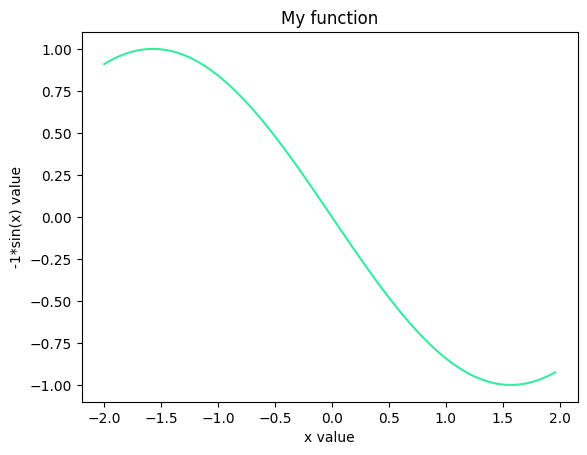

In [ ]:
import matplotlib.pyplot as plt

x = [-2 + i * 0.04 for i in range(100)] # генеруємо значення аргументу з певним невеликим приростом (0.04 у нашому випадку)
y = [second_derivative.evalf(subs={t: value}) for value in x] # використовуємо second_derivative, згенеровану в попередніх комірках
plt.title("My function")
plt.xlabel("x value")
plt.ylabel("-1*sin(x) value")
plt.plot(x, y, color='#34eb9e') # колір можна обрати за допомогою color picker

Хух, ми дійшли до кінця цього завдання. Його вартує охайно оформити у вигляді jupyter з готовою функцією, графіком-порівнянням та висновками після цього завдання.

Так, це ще не кінець...) 

Але наступне завдання буде ще цікавіше.

# Перетворення Фур'є (1 бал) 🐰

На парах математичного аналізу ви познайомилися з **рядами Фур'є** - інструментом, який дозволяє довільну періодичну функцію оцінити як рівномірно збіжний ряд з тригонометричних функцій. Ви вже  мали змогу самостійно обчислити ряд Фур'є для функції в індивідуальному письмовому завданні, а в цій роботі ми познайомимось з дотичним і дуже потужним інструментом - **дискретним перетвореннями Фур'є**.

Говорячи науково - перевторення Фур'є це переклад неперервного сигналу (хвилі) з формату "час-амплітуда" (**time domain**), де для кожної одиниці часу ми записуємо "гучність" хвилі, у формат "частота-амплітуда" (**frequency domain**), де ми маємо різні частоти, для кожної з якої знаємо її "гучність" у вихідному сигналі. Приклад на картинці:






[P.S. Тут можна створити свою хвилю та послухати звук](https://www.mathsisfun.com/physics/audio-spectrum-beats.html)

[P.S.S. Додаткове відеопояснення](https://www.youtube.com/watch?v=lUpSna_cWJE)

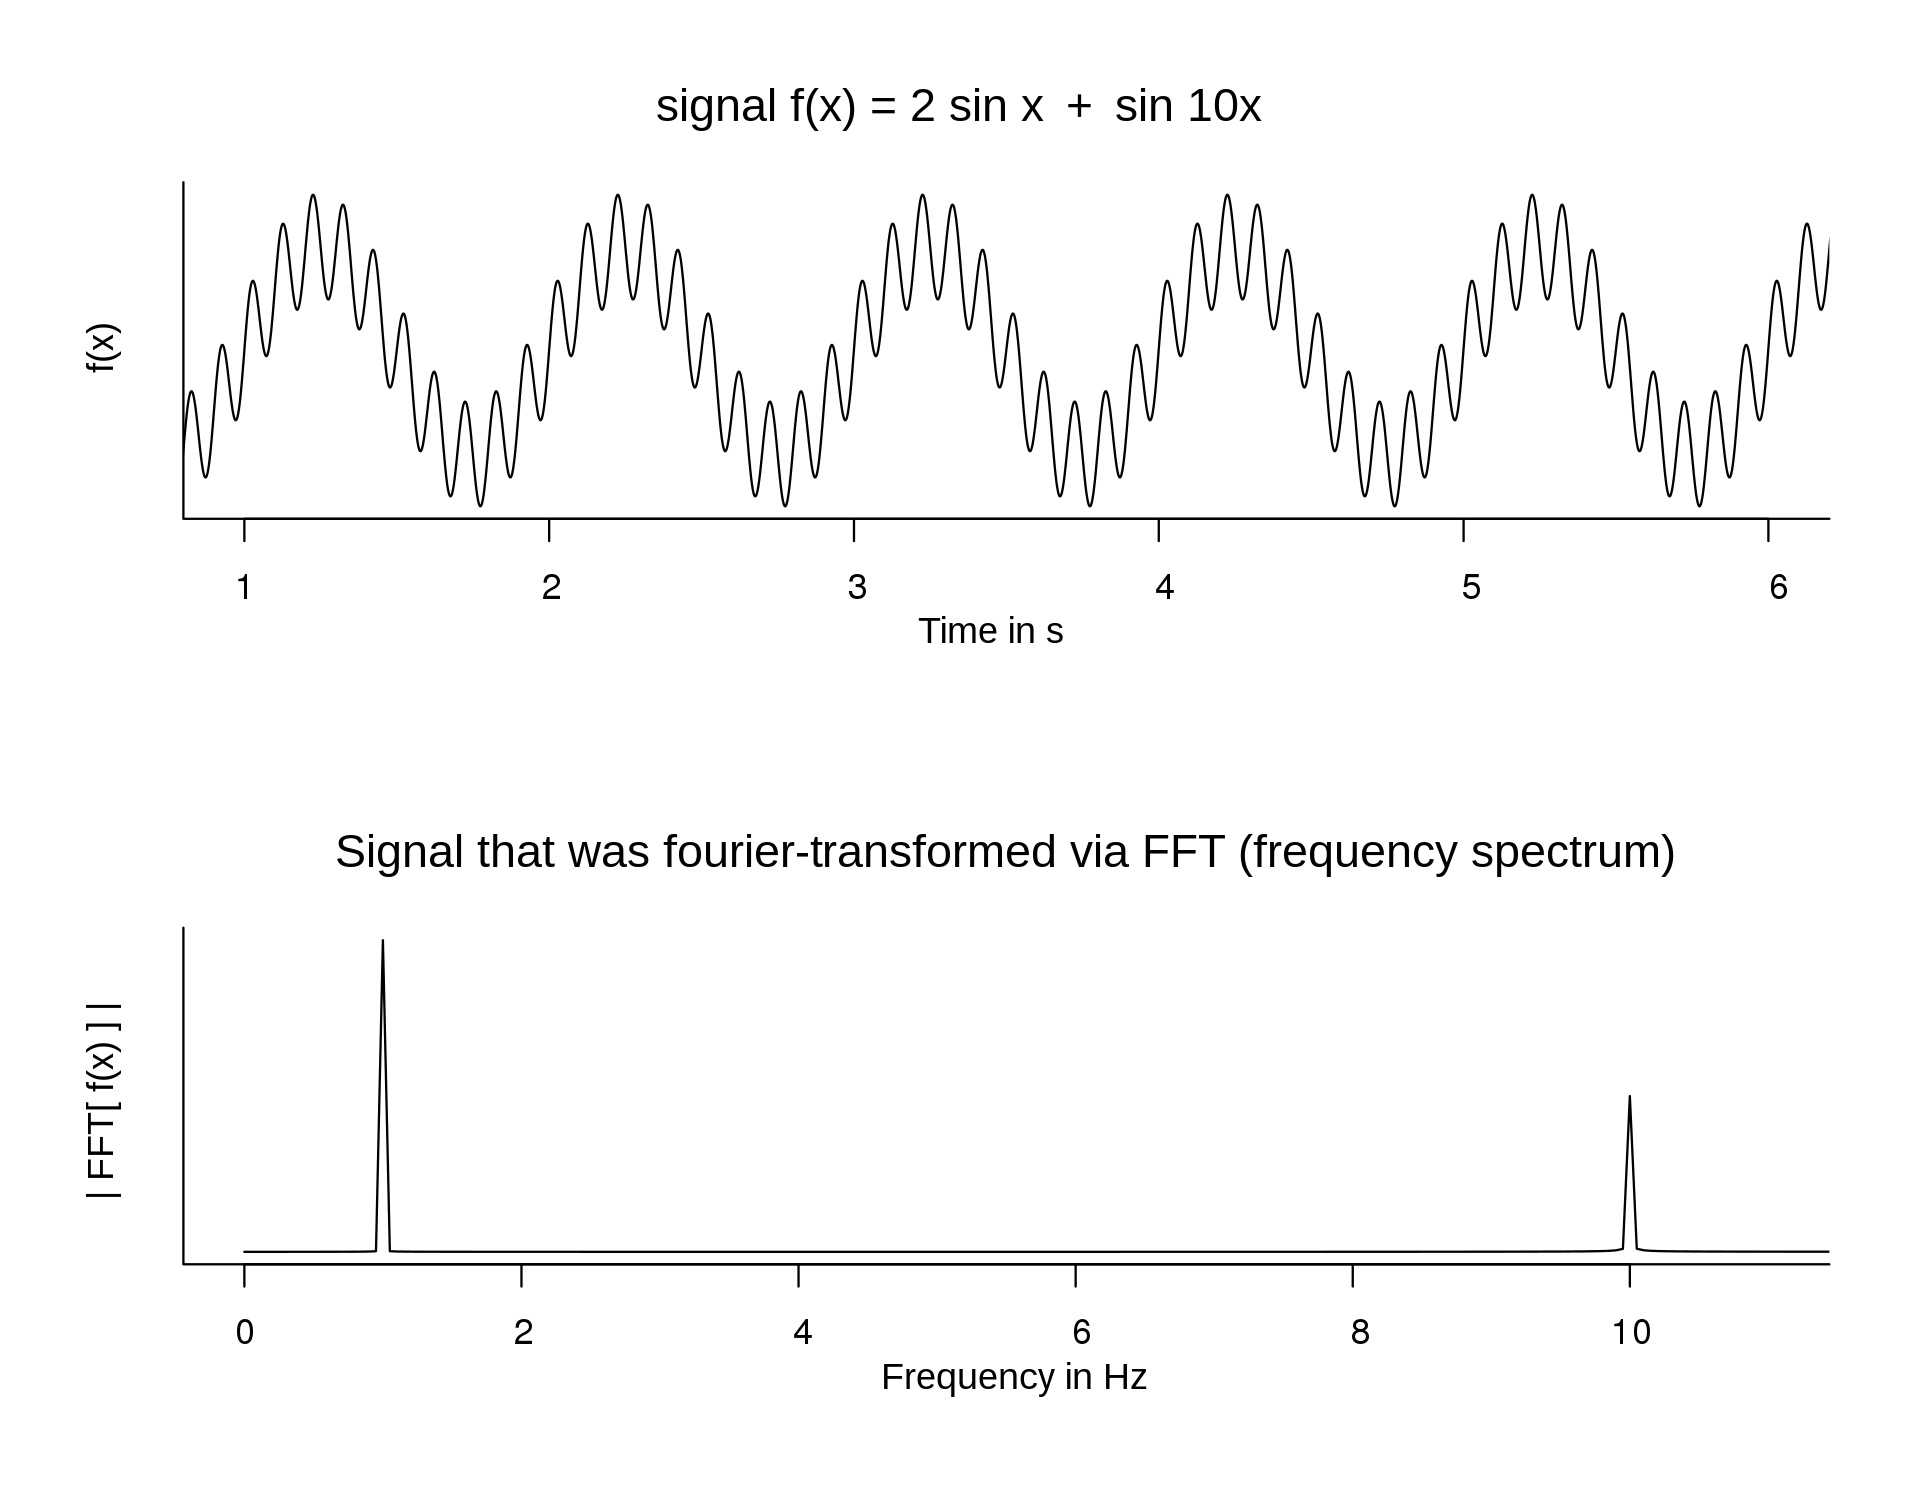

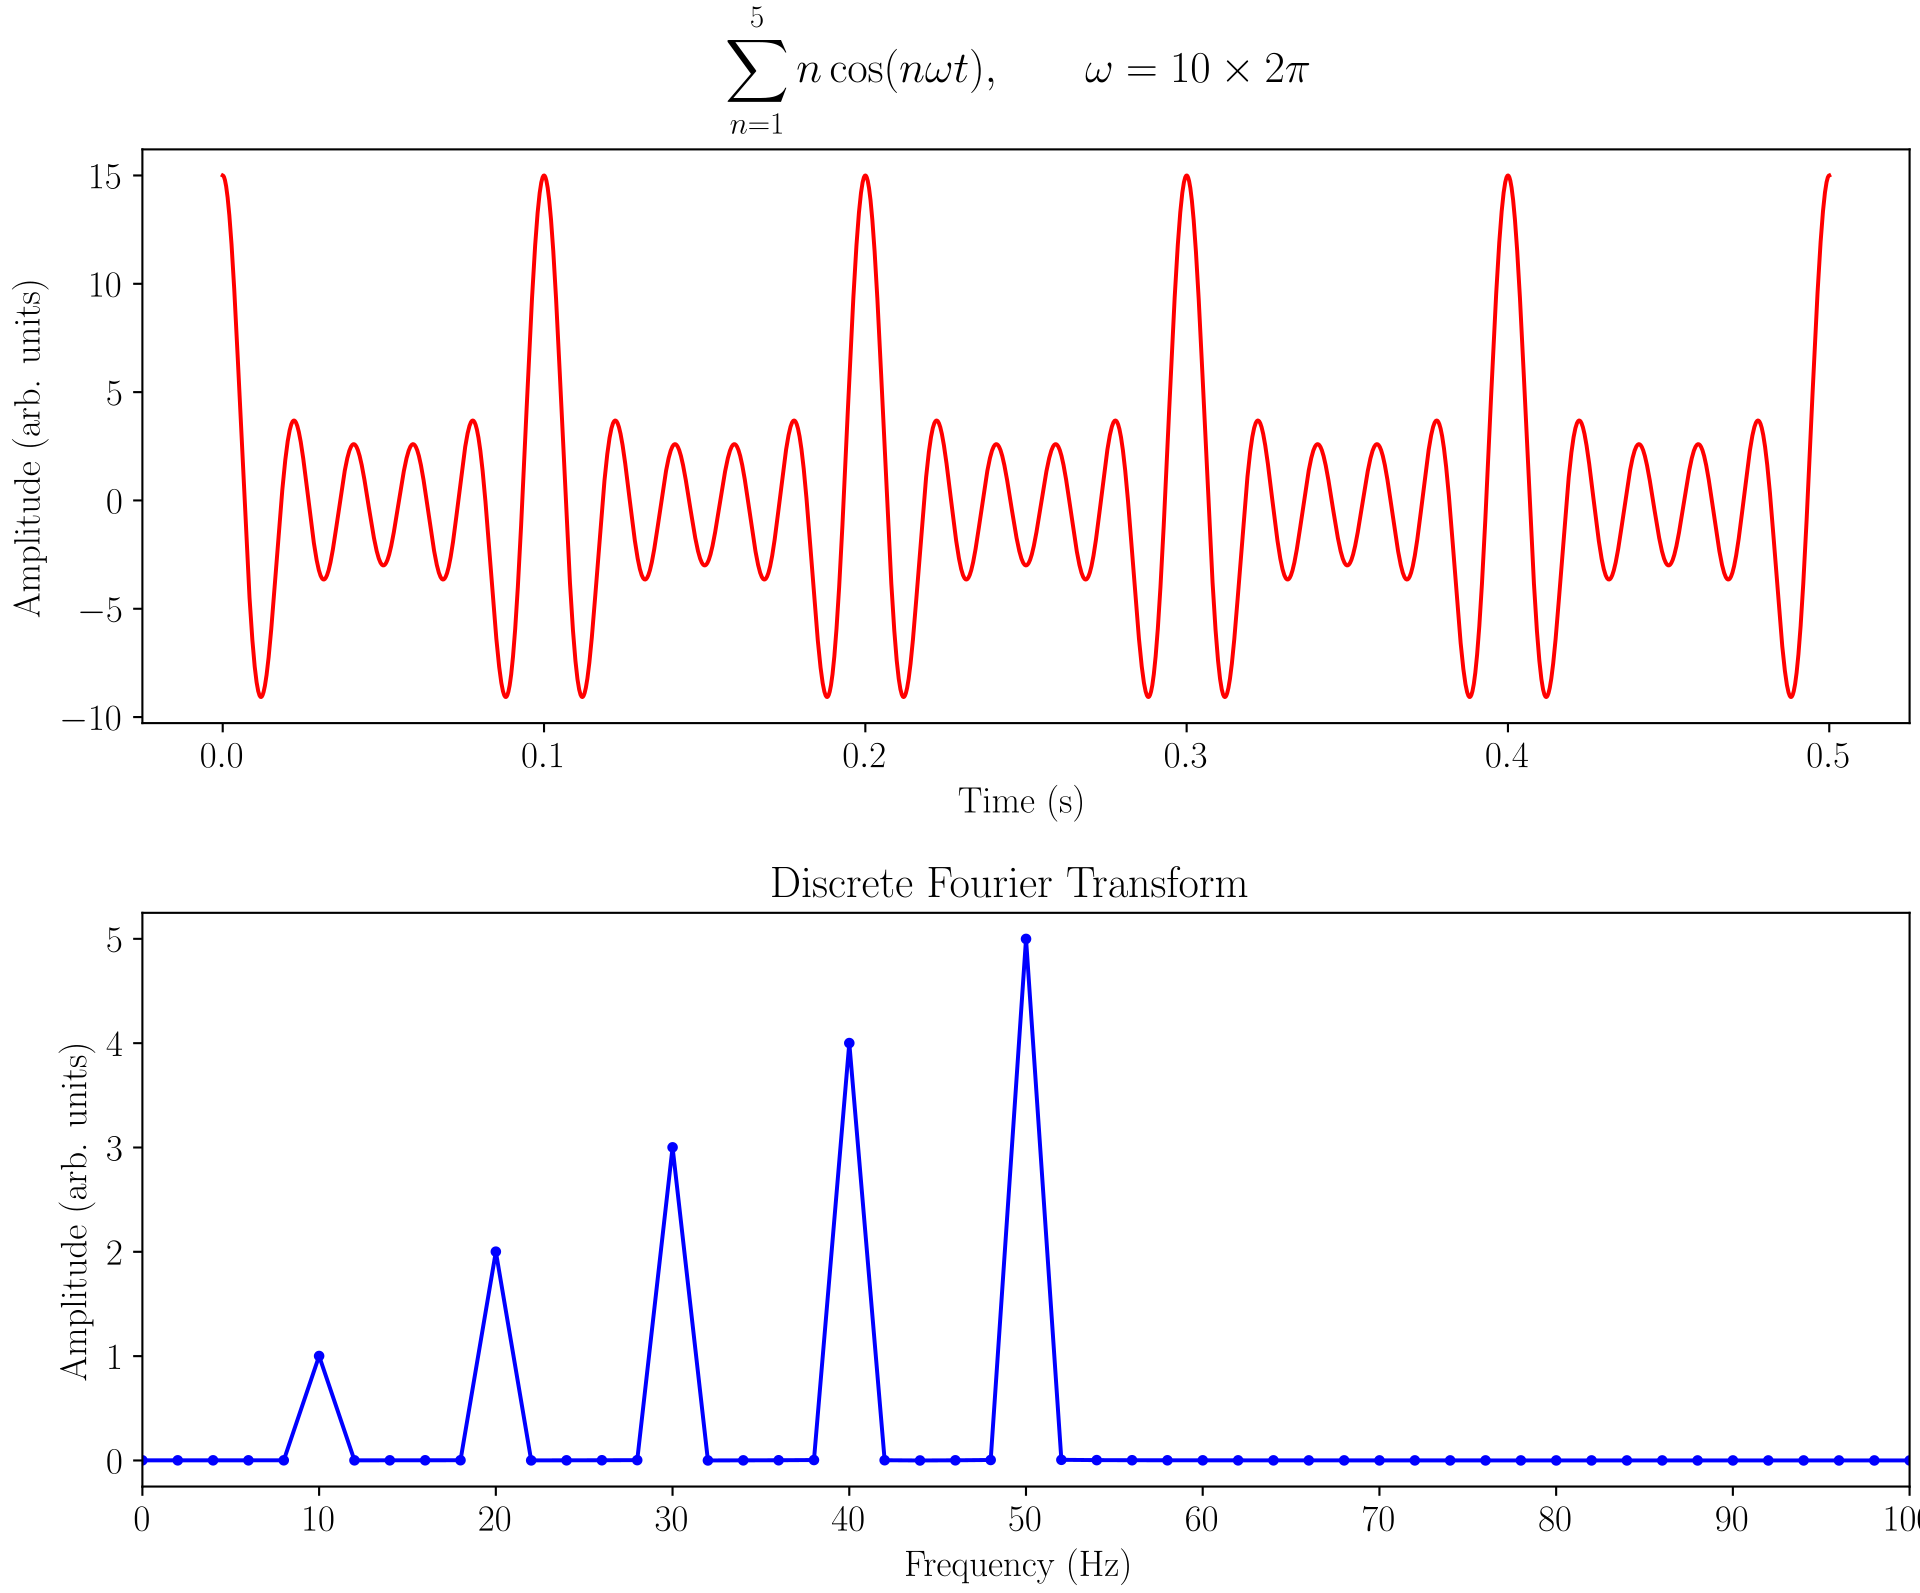

[© Wikipedia](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

Чи задумувалися ви колись  як [Shazam розпізнає пісню](https://medium.com/@anaharris/how-does-shazam-work-d38f74e41359) серед багатьох інших? Або як Siri чи Ok, Google [розуміють ваш голос](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520)? Або ж як треки в mp3 форматі займають вдесятеро менше пам'яті, ніж wav файли?

Відповідь на всі питання вище - перетворення Фур'є! І ми пропонуємо вам самим поекспериментувати з перетворенням запропонованого аудіо з хвилі в набір хвиль різної частоти і гучності. (За посиланнями в попередньому параграфі, а також за  [посиланням](https://youtu.be/spUNpyF58BY) можете глибше заглибитись у відповідні теми)





P.S. FFT у даному контексті означає *Fast Fourier Transform* - алгоритм для отримання перетворення Фур'є, в який, як і в звичайний алгоритм перетворення Фур'є, ми не будемо заглиблюватись, оскільки він потребує дуже глибокого знання лінійної алгебри, комплексного аналізу і аналізу сигналів. Головна його перевага - він **скорочує асимптотичну складність** аналізу з $O(N^2)$ (тут можна згадати перемноження матриць та зрозуміти чому така алгоритмічна складність) до $O(N\log N)$. Наприклад, на двох масивах розмірок у 100к елементів, функція np.convolve(arr1, arr2), яка використовується для пошуку накладання сигналів, працює всередньому близько 5 секунд, а scipy.signal.fftconvolve(arr1, arr2) - **у тисячу разів швидше** - ~5 мікросекунд. Ще одна демонстрація того, наскільки впливова асимптотична складність. (source: [3blue1brown](https://www.youtube.com/watch?v=KuXjwB4LzSA&t=822s))

**Приклад як це працює дискретне перетворення Фур'є:**

Тут ми зобразили суму двох хвиль-cинусоїдів.

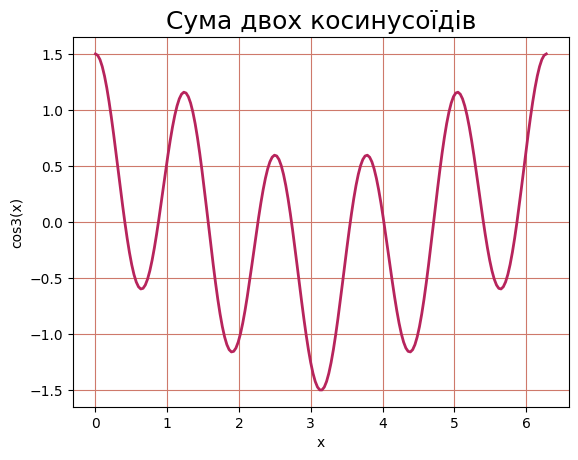

In [ ]:
T_cos3 = 2 * np.pi
N_cos3 = 200
x = np.linspace(0, T_cos3, N_cos3)
dt_cos3 = np.diff(x)[0]
cos1 = 0.5 * np.cos(x)
cos2 = np.cos(5*x)
cos3 = cos1 + cos2
plt.plot(x, cos3, color='#b7245c',
     linewidth=2)
plt.title('Сума двох косинусоїдів', fontsize=18)
plt.xlabel("x")
plt.ylabel("сos3(x)")
plt.grid(color='#ce796b')
plt.show()


Як можна побачити хвиля достатньо хаотична та не несе жодної важливої інформації.

Але ми можемо використати FFT, щоб зробити декомпозицію нашої хвилі та отримати важливу інформацію для нас, особливо про її "піки".

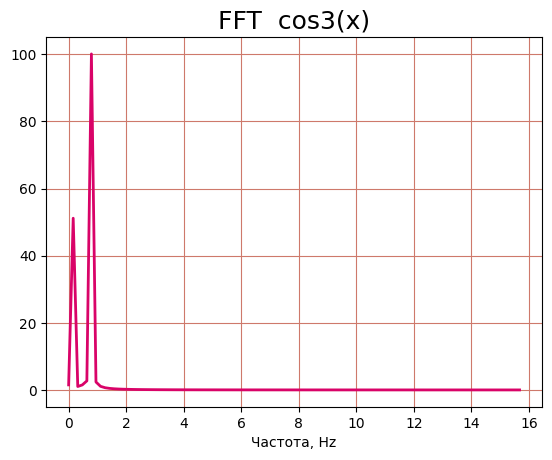

In [ ]:
cos3_freq = fftfreq(N_cos3, dt_cos3)
cos3_fft = fft(cos3)
plt.plot(cos3_freq[:N_cos3//2], np.abs(cos3_fft[:N_cos3//2]), color='#d90368',linewidth=2)
plt.title("FFT  cos3(x)", fontsize=18)
plt.xlabel("Частота, Hz")
plt.grid(color='#ce796b')
plt.show()



Matplotlib дає зручну можливість наближати графіки - тож можна краще розгледіти "піки" - найгучніші частоти оригінального запису

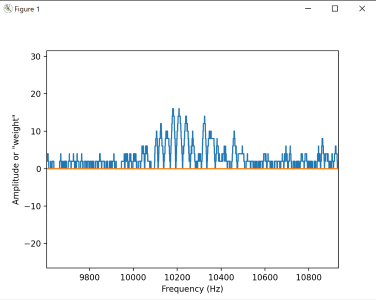

*Для чого нам "піки", запитаєте ви?*

"Піки" це по суті ті неприємні частоти для нашого вуха , які створюють шум у нашому аудіо. Якщо ми розглядаємо звук піаніно, то основні(фундаментальні) частоти для нього рахуються від 27.5 Hz до 4186 Hz. Коли нам потрібно отримати звук без шуму, тобто зробити його denoising, ми чистимо, де частоти менші за 27.5 Hz та більші за 4186 Hz.Для цього використовується багато алгоритмів, які ви будете детальніше вивчати на курсі Лінійної алгебри.

**Отже, завдання буде полягати у наступному:**

Спочатку у нас є даний звуковий файл. 

Свій варіант можна знайти за домогою даного коду(PS: перша велика літера прізвище англійською мовою)

**Варіанти:**
0.  brahms
1.  choice
2.  fishin
3.  humpback
1.  nutcracker
2.  pistachio
1.  robin
2.  sweetwaltz
1.  trumpet
2.  vibeace












In [ ]:
var = ord('P') % 10
var

Наприклад, у мене 0 варіант, тому моє аудіо буде 'brahms'.

In [ ]:
audio_path = librosa.example('brahms')
Audio(audio_path)

Для того, щоб побудувати нашу діаграму звукової хвилі, вартувало б знайти наш ряд та sampling_rate. Для цього необхідно використати вбудовану функцію бібліотеки librosa -  *load*.Детальніше можна почитати : [тут](https://librosa.org/doc/main/generated/librosa.load.html). 

Також потрібно дізнатися час , щоб побудувати графік залежностей час(у секундах) - амплітуда звуку.  Амплітуду нашого звуку відображає наш звуковий ряд.

Приклад як шукати час можна знайти тут:

In [ ]:
"time = np.arange(#розмір отриманого ряду) / #sampling_rate "
#Тут має бути ваш код для красивого графіка) Може бути використано matplotlib.pyplot

А далі потрібно ж глянути як трансформується наша хаотична хвиля за допомогою дискретного перетворення Фур'є 🐊

In [ ]:
#size = trumpet_sample.size  -> trumpet_sample це отриманий звуковий ряд
#time =  -> тут шукаємо час
#dt =  -> шукаємо sample spacing, який є inverse of sampling_rate

Далі необхідно застосувати метод fftfreq() , щоб знайти частоту.

Також застосуємо метод fft(), щоб нарешті виконати дискретне перетворення Фур'є.

Результат потрібно обов'язково зобразити на графіку, щоб побачити мегакласний результат). 

Для графіку беремо лише половину списку частот та перетвореного ряду , оскільки друга половина містить ті ж самі значення, просто домножені на -1), а також абсолютні значення перетвореного ряду.

In [ ]:
#freq[:size//2]
#np.abs(fft[:size//2])

*Що далі робити з цими даними, якщо на перший погляд вони такі хаотичні і незрозумілі?* 🍍


Наприклад, можна побудувати для них [спектограму](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520) - як уже зазначалося в статті про роботу Shazam i розпізнавання голосу - цим можна унікально ідентифікувати пісню, або ж відрізнити один голос від іншого.

Інше застосування цих же даних - машинне навчання. Даних багато і нам, людям, вони кажуть небагато, проте комп'ютерні моделі можуть виокремити з них потрібні нам інсайти.

Можна також помітити, що на графіку присутні тихі частоти. Можемо відкинути їх і добряче стиснути оригінальний файл без суттєвої втрати якості.

Якщо ж нам потрібно отримати оригінальний запис, ми просто "додаємо" одна до одної хвилі, домножені на їхню "вагу".

**Сподіваємося, вам була цікава ця мандрівка по складним, але дуже корисним у технологічному світі технологіям!** 